# train,test데이터 가져오기 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/금융문자/데이터')

In [102]:
ls

30000.csv
30000_from_ec2.csv
ansi_train.csv
AUC_pubtest_human_labeling/
contain_prepro_26500data.csv
데이터_EDA/
frontback/
ko.bin
Mecab-ko-for-Google-Colab/
numpy_arrays/
public_test.csv
s_200106_ep0_10_sam30Ksa_wsxSEPspacer_fb100c_X256tX256_bs32_vacc.csv
s_200106_ep0_758_sam30Ksa_wsxSEPspacer_fb100c_X256tX256_bs32_vacc.csv
s_200106_ep1_758_sam30Ksa_wsxSEPspacer_fb100c_X256tX256_bs32_vacc.csv
s_200106_ep2_758_sam30Ksa_wsxSEPspacer_fb100c_X256tX256_bs32_vacc.csv
s_200106_ep3_758_sam30Ksa_wsxSEPspacer_fb100c_X256tX256_bs32_vacc.csv
submission_제출양식.csv
submission_shinhan_1.csv.gsheet
T_academy_BERT/
temporary/
weights_folder/
검증.xlsx


In [104]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/금융문자/데이터/temporary/sam60K_lvDist_0_82222_1_whole.csv')
print(train.shape)
train.head()

(60037, 7)


,id,year_month,text,smishing,prep,len,lvDist
0,303496,2018-09,ㅡ,0,NaN,0,1.000000
1,147557,2017-08,XXXㅐㅐ,0,,1,1.000000
2,257777,2018-04,XXX0415 14:22XXXXXXXX카드스마트XXX710000잔액4869889,0,04151422 카드스마트 710000잔액4869889,31,0.967742
3,84368,2017-05,XX-XXX-XXX0전화하셔서0번누르시면상담원연결됩니다.사용자계약번호확인해주세요,0,0전화하셔서0번누르시면상담원연결됩니다사용자계약번호확인해주세요,34,0.947368
4,81268,2017-05,XXX-XX-XXX-XXX (1XXX입니다.감사합니다XXX은행XXX올림,0,1 입니다감사합니다 은행 올림,17,0.911765


In [4]:
test = pd.read_csv('public_test.csv',encoding='euc-kr')
print(test.shape)
test.head()

(1626, 3)


,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [0]:
# import tensorflow as tf
# from keras.datasets import imdb
# from keras.preprocessing.sequence import pad_sequences
# vocab_size = 20000
# (X_train2,Y_train2),(X_test,Y_test) = imdb.load_data(num_words=vocab_size)

In [0]:
# max_len = 500
# X_train2 = pad_sequences(X_train2, maxlen=max_len)
# X_test2 = pad_sequences(X_test, maxlen=max_len)

#언더샘플링 (스미싱과 아닌것 6.6%씩)

In [105]:
# 스미싱 개수 파악
from collections import Counter


Counter(train['smishing'])

Counter({0: 41334, 1: 18703})

In [0]:
1511/0.06

25183.333333333336

In [0]:
# 스미싱인 데이터의 6.6% 값 
18703*0.066

1234.3980000000001

In [0]:
# 스미싱이 아닌 데이터의 6.6%의 값
277242*0.066

18297.972

In [0]:
# # 랜덤으로 인덱스값 꺼내오기
# import random
# random.seed(2019)
# train_nsm_list=list(train[train['smishing']!=1].index)
# train_nsmishing = random.sample(train_nsm_list,18298)

# random.seed(2019)
# train_sm_list = list(train[train['smishing']==1].index)
# train_smishing = random.sample(train_sm_list,1235)


In [0]:
# 30000개로 추린 csv에 한한 코드
import random
random.seed(2019)
train_nsm_list=list(train[train['smishing']!=1].index)
train_nsmishing = random.sample(train_nsm_list,18700)

random.seed(2019)
train_sm_list = list(train[train['smishing']==1].index)
train_smishing = random.sample(train_sm_list,18700)


In [107]:
len(train_smishing)

18700

In [0]:
# drop =True는 기존의 인덱스 컬럼을 드랍하는 것
train_xx = train.iloc[train_smishing+train_nsmishing,:].reset_index(drop=True)


In [0]:
train_yyy=train_xx['smishing']

In [0]:
# train_yy=pd.DataFrame(train['smishing'],columns=['smishing']) 
# train_yyy=train_yy.iloc[train_smishing+train_nsmishing,:].reset_index(drop=True)

In [0]:

test['smishing']=2 #train data와 동일한 형태 생성을 위해 임의의 숫자를 추가 #이후 스미싱 여부 확률 값으로 덮어 씌워짐
test_xx=pd.DataFrame(test['text'])
test_yyy=pd.DataFrame(test['smishing'])

In [0]:
# train_yy = pd.DataFrame()
# train_yy['smishing'] = train_xx['smishing']

In [113]:
train_xx

,id,year_month,text,smishing,prep,len,lvDist
0,66689,2017-04,(광고)XXX금융소비자 질문 TOP31. 가상조회는 신용등급에 영향이 없나요?소정의...,1,광고 금융소비자질문TOP31가상조회는신용등급에영향이없나요소정의점수는차감이되지만등급이...,658,0.064011
1,185002,2017-10,(광고)XXX XXX 안녕하세요 . XXX 여신영업부입니다.더운날씨에 각종 홍보전...,1,광고 안녕하세요 여신영업부입니다더운날씨에각종홍보전화와문자를받으셨을텐데우선장문의문자를...,454,0.022026
2,24182,2017-03,(광고)한국XXX bank나의 대출한도와 금리는?자신도 모르는 사이에 악성과다의 늪...,1,광고한국 bank나의대출한도와금리는자신도모르는사이에악성과다의늪에빠져허덕이고있다면2분...,689,0.004354
3,306612,2018-09,(광고)XXX금전을 요구하는건 보이XXX입니다. 유의하세요!높은금리 상품로 현재 힘...,1,광고 금전을요구하는건보이 입니다유의하세요높은금리상품로현재힘이든사람한달일하고받은돈대부...,680,0.007353
4,264285,2018-05,(광고)XX XXX 안녕하세요 . XXX 여신영업부입니다.바쁘신 와중에 각종 홍보전...,1,광고 안녕하세요 여신영업부입니다바쁘신와중에각종홍보전화와문자를받으셨을텐데우선장문의문자...,593,0.026981
...,...,...,...,...,...,...,...
37395,161100,2017-09,XXX 고객님912 바쁘신와중에도 XXX송내역지점을 찾아주셔서 진심으로 감사드립니다...,0,고객님912바쁘신와중에도 송내역지점을찾아주셔서진심으로감사드립니다업무보시면서궁금하시...,116,0.895833
37396,283473,2018-07,안녕하세요7월만기확인하시고 재예치부탁드려요XXX태릉역지XXX,0,안녕하세요7월만기확인하시고재예치부탁드려요 태릉역지,28,0.900990
37397,3942,2017-01,알고는 있지만 다시 들으니재미있는 아재 개그!!한바탕 웃고 가세요1)바람이 귀엽게 ...,0,알고는있지만다시들으니재미있는아재개그한바탕웃고가세요1바람이귀엽게불면2사람을일으키는숫자...,227,0.907489
37398,149484,2017-08,작은 미소로 시작해서행복으로 가득채우고.큰 미소로 마무리하는사랑스런 주말 보내세요X...,0,작은미소로시작해서행복으로가득채우고큰미소로마무리하는사랑스런주말보내세요 양 올림,42,0.850746


# --------------------------------------------

# Okt 전처리된 데이터 불러오기 (prepro_text)

In [10]:
prepro_train = pd.read_csv('contain_prepro_26500data.csv')
print(prepro_train.shape)
prepro_train

(26500, 6)


,Unnamed: 0,Unnamed: 0.1,text,smishing,prepro_text,pad_seq_data
0,0,0,(광고)X (광고)(XXX) 전문상담원(XX-XXX-XXX 고객님께서는 국민행복기...,1,광고 x 광고 전 문 상담 원 xxxxxxxx 고객 님 께서는 국민 행복 기금 신용...,"[63, 2029, 63, 274, 486, 19, 161, 440, 5, 6, 1..."
1,1,1,(광고)XXX1월이벤트빠르게천만원월39000원통화1번(무료거부XXX-XXX-XXX),1,광고 1월 이벤트빠르게천만원월 39000원 통화 1 번 무료 거부 xxxxxxxxx,"[63, 488, 22793, 13324, 468, 36, 256, 95, 47, 50]"
2,2,2,htmlbodyBR(광고)신용협동조합brbr함께 XXX고 어려울 때 힘이 되는 당신...,1,htmlbodybr 광고 신용협동조합 brbr 함께 고 어려울 때 힘 되는 당신 의...,"[22794, 63, 4756, 3280, 100, 74, 2963, 92, 380..."
3,3,3,(광고)XX lt정확하고 올바른 신용대출gt 당사상품의 자격기준과 심사기준이 완화...,1,광고 xx lt 정확하고 올바른 신용 대출 gt 당 사 상품 의 자격 기준 과 심사...,"[63, 2211, 10115, 1763, 1545, 66, 8, 6516, 244..."
4,4,4,(광고)XXXbrbr (광고)XXX 믿음과 가치로 보답하는 XXX 가...,1,광고 xxxbrbr 광고 믿음 과 가치 로 보답 하는 가치 있는 소비 가치 있는 지...,"[63, 22798, 63, 2092, 12, 1334, 9, 1179, 42, 1..."
...,...,...,...,...,...,...
26495,26495,26495,XXX 고객님신년도 달력 배부중이오니시간되실때 내점 부탁드려요XXX드리며쌀쌀한 날씨...,0,고객 님 신 년도 달력 배부 중 이오니 시간 되실 때 내 점 부탁드려요 드리며 쌀쌀...,"[5, 6, 114, 5169, 717, 2048, 58, 1659, 55, 828..."
26496,26496,26496,고객님의전담직원이되었습니다.든든한동반자가되겠습니다XXX올림,0,고객 님 의 전담 직원 되었습니다 든든한 동반 자 되겠습니다 올림,"[5, 6, 3, 556, 150, 349, 973, 1206, 89, 901, 4]"
26497,26497,26497,대출만기연장상담바랍니다XXX은행방이동XXX올림,0,대출 만 기연 장 상담 바랍니다 은행 방이동 올림,"[8, 45, 7639, 17, 19, 25, 1, 4447, 4]"
26498,26498,26498,기회를찾아야 기회를만든답니다 (ㅡ)XXX은행XXX올림,0,기회 찾아야 기회 만든답니다 은행 올림,"[325, 14842, 325, 15393, 1, 4]"


In [0]:
# csv에서 가져온 데이터를 그대로 쓰면 오류가 나기 때문에 str타입으로 변경해서 리스트에 저장
str_prepro= []

for i in prepro_train['prepro_text']:
    str_prepro.append(str(i))
    

# ------------------------------------------------

# Mecab, konlpy 패키지 설치 (둘 중 하나만 설치해야한다 둘다 설치하면 오류남)

In [0]:
# ! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [0]:
# cd Mecab-ko-for-Google-Colab/

/content/drive/My Drive/금융문자/데이터/Mecab-ko-for-Google-Colab


In [0]:
# ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [0]:
# pip install konlpy하면 bash 실행해도 mecab설치 안됨 바로 bash실행
# ! bash install_mecab-ko_on_colab190912.sh 

In [0]:
# from konlpy.tag import Mecab
# tokenizer = Mecab()

In [69]:
pip install konlpy

     |████████████████████████████████| 19.4MB 163kB/s 
     |████████████████████████████████| 2.3MB 72.0MB/s 
     |████████████████████████████████| 92kB 15.3MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# Okt 전처리 시작 (단, train은 전처리된 csv가 있으므로 test데이터만 전처리)

In [0]:
import time
from konlpy.tag import Okt
tokenizer = Okt()

In [0]:
# import re
# pat =re.compile('[^가-힣0-9a-z ]')
# a= pat.sub('',train_xx['text'][0].lower())
# tokenizer.pos(a)

In [114]:
# 특수문자 제거 및 영어 소문자로 전환. 

import re
start = time.time()
pat = re.compile('[^가-힣0-9a-z!?% ]')
a= train_xx['text'].apply(lambda x : pat.sub('',x.lower()))
train_doc = [(tokenizer.pos(x),y) for x,y in zip(a,train_yyy)]
time.time() - start

919.3016357421875

In [0]:
import re
pat = re.compile('[^가-힣0-9a-z!?% ]')
a= test_xx['text'].apply(lambda x : pat.sub('',x.lower()))
test_doc = [(tokenizer.pos(x),y) for x,y in zip(a,test_yyy['smishing'])]

In [0]:
stopwords = ['xxx', '.', '을', '를', '이', '가', '-', '(', ')', ':', ')-', '.-', 'ㅡ', 'xxxxxx', '..', '.(', '은', '는'] #필요없는 단어 리스트

def get_couple(words):
    global stopwords
    words = [i[0] for i in words if i[0] not in stopwords]
    # words = [i[0] for i in words if len(i[0]) >1]
    return words


In [0]:
X_train, Y_train = [],[]

for lwords in train_doc:
    Y_train.append(lwords[1])

    temp = []

    for x in get_couple(lwords[0]):
        # if len(x) >1:
        temp.append(x)

    X_train.append(' '.join(temp))
        

    

In [0]:
# Y_train = prepro_train['smishing']

In [0]:
# 라벨을 numpy array형식으로 전환
import numpy as np

Y_train = np.array(Y_train)

In [123]:
Y_train

array([1, 1, 1, ..., 0, 0, 0])

In [124]:
len(Y_train)

37400

In [46]:
train_xx['text'][0]

'(광고) S B I XXX XXX안녕하세요하루하루 힘든업무와 스트레스에 고생많으십니다여유시간을 내어 읽어 주신다면 도움이 되실거라 생각되어 XXX을 보내드립니다2017년 하반기 정부지원 상품이 개편되어 안내드립니다금년 낮은 금리로 대출금 이용하실수 있는 마지막 기회입니다.고민하지 마시고 전화주세요본상품은 서민지원대출로 정부에서 지원하고S B I XXX에서 판매하는대출상품입니다.상품특징1.무담보! 무보증! 무수수료!2.신용등급상관없이3.최고한도 90004.최하금리4.24%  9.89%5.상환수수료 없이 자유롭게 상환가능!6.기존대출 저금리 전환가능자격조건1.만21세65세2.직장인.사업자.프리랜서.주부3.최근부결자.다중채무자 가능신청기간9월29일마감.접수자가 많으니 빠른신청 바랍니다신청방법상담 가능하실때 카톡추가.또는 전화주시면 상담가능하십니다상담전화XXX-XXX-XXX카카오톡문의 아이디 bb745 입니다해당이 되지 않으시거나 거부를 원하시는 분들은 거부라고 회신하여 주신다면 재발송 않도록 하겠습니다 번호의 오류나 전산의 실수가 있을 수 있사오니 양해 부탁드립니다무료거부 XXX-XXX-XXX(광고)S B I XXX XXX'

In [0]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer()
t.fit_on_texts(X_train) # 앞서 불러와서 str타입으로 저장했던 전처리된 train데이터를 keras tokenizer에 돌림

In [0]:
x_seq = t.texts_to_sequences(X_train)

In [0]:
max_len = max([len(i) for i in x_seq])

In [128]:
max_len

413

In [129]:
vocab_size = len(t.word_index)
vocab_size

47190

In [0]:
from keras.preprocessing.sequence import pad_sequences 
x_pad_seq = pad_sequences(x_seq,maxlen=max_len)

In [131]:
len(x_pad_seq)

37400

# word2vec train데이터로만 학습

In [0]:
# train.head()

,text,smishing
0,q()p -(((((-메리 크리스마스 !많이 웃으세요 미래가...,0
1,-()- ()XXX 고객님복 많이 받으세요즐거운...,0
2,XXX 고객님메리크리스마스!!즐거운 성탄절이다가 왔습니다.가족친지분...,0
3,겨울 사랑하는 사람아우리에게 겨울이 없다면무엇으로 따뜻한 포옹이...,0
4,근 하 신 년 XXX 고객님께!설레는 마음으로 시작했던 2017년도...,0


In [0]:
import re
pat = re.compile('[^가-힣0-9a-z ]')
a= train['text'].apply(lambda x : pat.sub('',x.lower()))



In [0]:
train_wv_doc = [tokenizer.morphs(x) for x in a]

In [0]:
Ny# len(train_wv_doc)JU

295945

In [0]:
# a[0]

'xxx은행성산xxx팀장입니다행복한주말되세요'

In [0]:
train_wv_doc[:2]

[['행성', '산', '팀장', '행복', '주말'], ['오늘', '하루', '시작', '은행', '진월동', '라운지']]

In [132]:
X_train[:2]

['광고 금융 소비자 질문 top 31 가상 조회 신용등급 에 영향 없나요 ? 소정 의 점수 차감 되지만 등급 하락 할 정도 로 영향 있는 것 아닙니다 2 카드 장기 단기 대출 신용 에 안 좋은 건가 요 ? 카드 업 권 할부 금융 사 이기 때문 에 신 용평 가사 에서 안 좋게 반영 됩니다 3 연체 없어도 신용등급 떨어지나요 ? 신용등급 기준 연체 뿐 만 아니라 채무 내용 과 카드 사용 등등 반영 되기 때문 에 한가지 내용 으로 판단 할 수 없습니다 상담 신청 문자 로 상담 이라고 회신 해주시거나 전화 주시 면 최선 다해 도 와 드릴 것 약속 합니다 대출 상품 안내 1 직장인 신용 대출 한도 1억 4000만 금리 297% 자격 자체 등급 과 기업 리스트 에 따라 차등 적용 2 채무 통합 전환 대출 한도 연봉 대비 300% 금리 297% 자격 자체 등급 과 기업 리스트 에 따라 차등 적용 3 희망 홀씨 한도 2500만 원 금리 868% 12% 자격 연 소득 4000만 원 이하 고객 대상 으로 자체 등급 에 따라 차등 적용 상품 의 특징 1 당사 거래 전혀 없어도 대출 가능 2 시중 은행 보다 높은 한도 3 자체 등급 으로 판단 하므로 저 신용 자 도 대출 가능 4 부채 많다면 부채 통합 상품 으로 전환 가능 5 원리금 균등 방식 이자 만 내는 만기일 시로 전환 가능 6 가상 조회 통해 한도 및 금리 한 번 에 확인 가능 이런 분 들 께 권 해드립니다 1 이미 시중 은행권 에서 대출 한도 모두 사용 중 이신 분 2 기존 대출 의 원리금 균등 방식 으로 인해 월납 입금 액 부담스러우신 분 3 총 대출 금액 적으나 대출 건 수가 많아서 관리 안 되는 분 4 이제 라도 대출 로 인한 신용등급 관리 및 상승 에 관심 있으신 분 상담 신청 문자 로 상담 이라고 회신 해주시거나 전화 주시 면 최선 다해 도 와 드릴 것 약속 합니다 수신 희망 하지 않으실 경우 에는 거부 안녕하세요',
 '광고 안녕하세요 여 신 영업 부 입니다 더운 날씨 에 각종 홍보 전화 와 문자 받으셨을텐데

In [0]:
# wv_list = []

# for i in str_prepro:
#     wv_list.append(i.split(' '))

In [0]:
wv_list = []

for i in X_train:
    wv_list.append(i.split(' '))

In [136]:
wv_list[:1]

[['광고',
  '금융',
  '소비자',
  '질문',
  'top',
  '31',
  '가상',
  '조회',
  '신용등급',
  '에',
  '영향',
  '없나요',
  '?',
  '소정',
  '의',
  '점수',
  '차감',
  '되지만',
  '등급',
  '하락',
  '할',
  '정도',
  '로',
  '영향',
  '있는',
  '것',
  '아닙니다',
  '2',
  '카드',
  '장기',
  '단기',
  '대출',
  '신용',
  '에',
  '안',
  '좋은',
  '건가',
  '요',
  '?',
  '카드',
  '업',
  '권',
  '할부',
  '금융',
  '사',
  '이기',
  '때문',
  '에',
  '신',
  '용평',
  '가사',
  '에서',
  '안',
  '좋게',
  '반영',
  '됩니다',
  '3',
  '연체',
  '없어도',
  '신용등급',
  '떨어지나요',
  '?',
  '신용등급',
  '기준',
  '연체',
  '뿐',
  '만',
  '아니라',
  '채무',
  '내용',
  '과',
  '카드',
  '사용',
  '등등',
  '반영',
  '되기',
  '때문',
  '에',
  '한가지',
  '내용',
  '으로',
  '판단',
  '할',
  '수',
  '없습니다',
  '상담',
  '신청',
  '문자',
  '로',
  '상담',
  '이라고',
  '회신',
  '해주시거나',
  '전화',
  '주시',
  '면',
  '최선',
  '다해',
  '도',
  '와',
  '드릴',
  '것',
  '약속',
  '합니다',
  '대출',
  '상품',
  '안내',
  '1',
  '직장인',
  '신용',
  '대출',
  '한도',
  '1억',
  '4000만',
  '금리',
  '297%',
  '자격',
  '자체',
  '등급',
  '과',
  '기업',
  '리스트',
  '에',
  '따라',
  '차등',


In [0]:
from gensim.models import Word2Vec
word2vec_train = Word2Vec(wv_list, size=200, window=5, min_count=5, workers=4, sg=1)

In [0]:
t.fit_on_texts(train_wv_doc)

In [0]:
vocab_size = len(t.word_index)+1
vocab_size

17806

# ---------------------------------------------

# word2vec pretrain된 데이터 가져오기

In [0]:
import gensim

model = gensim.models.Word2Vec.load('/content/drive/My Drive/tabditor/소스코드/기능1. 문맥에 맞는 단어 추천/ko.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import numpy as np
embedding_matrix = np.zeros((vocab_size,200))


In [0]:
def get_vector(word):
    if word in word2vec_train:
        return word2vec_train[word]
    else:
        return None

In [140]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어와 정수 인덱스를 1개씩 꺼내온다.
    temp = get_vector(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None: # 만약 None이 아니라면 임베딩 벡터의 값을 리턴받은 것이므로
        embedding_matrix[i] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


# 모델링

In [0]:
# 버다나우 어텐션 클래스
import tensorflow as tf

class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)
    # context_vector = tf.clip_by_value(context_vector)
    # print(attention_weights)

    return context_vector, attention_weights

In [0]:
# f1 스코어 함수
import keras.backend as K

def f_f1_score(y_true, y_pred):
    # print(y_true)#, y_pred)
    # print(y_pred)
    def recall(y_true, y_pred):
        """Recall metric.
        Only computes a batch-wise average of recall.
        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.
        Only computes a batch-wise average of precision.
        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))

    return f1

def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [0]:
# model1.add(Embedding(vocab_size,200,weights=[embedding_matrix],input_length=max_len,trainable=False))
# # model1.add(Embedding(vocab_size,200)) 성능 개같음 
# model1.add(LSTM(128,dropout=0.2,return_sequences=True))
# model1.add(LSTM(128,dropout=0.2))
# model1.add(Dense(1,activation='sigmoid'))


inputs=Input(shape=(max_len,),dtype='int32')
Embedding(vocab_size,200,weights=[embedding_matrix])(inputs)

In [0]:
# max_len= 487

In [55]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, BatchNormalization
from tensorflow.keras import Input, Model,Sequential
from tensorflow.keras import optimizers
# import os

# model1 = Sequential() 
# model1.add(Embedding(vocab_size,200,weights=[embedding_matrix],input_length=max_len,trainable=False)) 
inputs=Input(shape=(max_len,),dtype='int32')
embedding_seq= Embedding(vocab_size,200,input_length=max_len,weights=[embedding_matrix])(inputs)
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional \
(LSTM(128,dropout=0.3,return_sequences=True,return_state=True,recurrent_activation='relu',recurrent_initializer='glorot_uniform'))(embedding_seq)

In [0]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

In [0]:
attention = BahdanauAttention(128) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)
hidden = BatchNormalization()(context_vector)

In [0]:
output = Dense(1, activation='sigmoid')(hidden)
model1 = Model(inputs=inputs, outputs=output)

In [0]:
Adam = optimizers.Adam(lr=0.1e-6,clipnorm=1.)
#, clipnorm=1.

In [60]:
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 404)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 404, 200)     9033000     input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) [(None, 404, 256), ( 336896      embedding_3[0][0]                
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 256)          0           bidirectional_3[0][1]            
                                                                 bidirectional_3[0][3]      

In [0]:
# focal_loss 정의 
from keras import backend as K
import tensorflow as tf

# Compatible with tensorflow backend

def focal_loss(gamma=2., alpha=.25):
	def focal_loss_fixed(y_true, y_pred):
		pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
		pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
		return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
	return focal_loss_fixed

In [0]:
# bilstm_no_w2vec_140+epoch.h5
from tensorflow.keras.callbacks import ModelCheckpoint
ck = ModelCheckpoint(filepath='weights_folder/bilstm_with_binaryCE_2040++epoch.h5',verbose=1,save_weights_only=True,monitor='acc',mode='auto')

In [61]:
model1.compile(optimizer=Adam,loss='binary_crossentropy',metrics=['acc',f_f1_score,recall,precision])
model1.fit(x_pad_seq,Y_train,batch_size=1024,validation_split=0.1,epochs=500 )

Train on 23850 samples, validate on 2650 samples
Epoch 1/500
 4096/23850 [====>.........................] - ETA: 22s - loss: nan - acc: 0.0674 - f_f1_score: 0.1261 - recall: 1.0000 - precision: 0.0674

KeyboardInterrupt: ignored

In [0]:
!nvidia-smi 

Tue Jan  7 15:30:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    32W / 250W |    611MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
 model1.load_weights('weights_folder/bilstm_with_binaryCE_2040++epoch.h5')

# LSTM 써보기 

In [0]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding

model1 = Sequential()
model1.add(Embedding(vocab_size, 200,weights = [embedding_matrix],input_length=max_len,trainable=False))
model1.add(LSTM(128,return_sequences=True,dropout=0.2))
model1.add(LSTM(128,dropout=0.2))

model1.add(Dense(1, activation='sigmoid'))


In [142]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 413, 200)          9438000   
_________________________________________________________________
lstm_11 (LSTM)               (None, 413, 128)          168448    
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 9,738,161
Trainable params: 300,161
Non-trainable params: 9,438,000
_________________________________________________________________


In [143]:

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc',f_f1_score,recall,precision])
history = model1.fit(x_pad_seq, Y_train, epochs=10, batch_size=1024, validation_split=0.1)

Train on 33660 samples, validate on 3740 samples
Epoch 1/10
33660/33660 [==============================] - 42s 1ms/step - loss: 0.1513 - acc: 0.9434 - f_f1_score: 0.9488 - recall: 0.9570 - precision: 0.9474 - val_loss: 0.0141 - val_acc: 0.9992 - val_f_f1_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
33660/33660 [==============================] - 39s 1ms/step - loss: 0.0279 - acc: 0.9920 - f_f1_score: 0.9926 - recall: 0.9902 - precision: 0.9953 - val_loss: 0.0218 - val_acc: 0.9957 - val_f_f1_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
33660/33660 [==============================] - 39s 1ms/step - loss: 0.0245 - acc: 0.9936 - f_f1_score: 0.9943 - recall: 0.9924 - precision: 0.9963 - val_loss: 0.0040 - val_acc: 0.9997 - val_f_f1_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/10
33660/33660 [==============================] - 39s 1ms/step - loss: 0.0110 - acc: 0.9964 - f_f1_score: 0.9967

In [0]:
ls weights_folder

 bilstm_no_w2vec_140+epoch.h5
 bilstm_no_w2vec_50epoch.h5
 bilstm_with_binaryCE_1040epoch.h5
 bilstm_with_binaryCE_1740+epoch.h5
 bilstm_with_binaryCE_1840+epoch.h5
 bilstm_with_binaryCE_1840+epoch_recovery.h5
 bilstm_with_binaryCE_2040++epoch.h5
 bilstm_with_binaryCE_2040++epoch.hdf5
 bilstm_with_binaryCE_540+epoch.h5
 bilstm_with_binaryCE_740epoch.h5
 bilstm_with_focalloss_643epoch.h5
'bilstm_with_focalloss_epoch (1).h5'
 bilstm_with_focalloss_epoch.h5


In [0]:
# model1.save_weights('../../data30000_lstm_2layer.h5')

In [0]:
x_test =[]

for lwords in test_doc:
    temp=[]
    for x in get_couple(lwords[0]):
        # if len(x) >1:
        temp.append(x)
    x_test.append(' '.join(temp))

In [0]:
x_test[0]

'고객 님 ! 안녕하세요 ? 새롭게 시작 하는 한 주 행복 가득하시길 기원 합니다 지난주 글로벌 증시 파월 미 연 준 의장 통화정책 에 대해 완화 적 인 태도 변화 보인 것 주초 투자 심리 개선 으로 이어지며 큰 폭 상승 마감 했습니다 더불어 미 중 차관 급 무역 협상 순 조 롭 게 진행 된 점도 긍정 적 이었습니다 원 달러 환율 주간 75원 으로 하락 하는 가운데 외국인 투자자 의 국내 증시 순 매수 규모 8천억 상회 하며 수급 개선 된 점도 주목 해볼 필요 있습니다 금주 시장 미국 금융 주 실적 발표 시작 으로 본격 적 인 실적 시즌 에 진입 하게 됩니다 지난주 애플 삼성 전자 등 주요 기업 들 의 1분 기 실적 전망 하향 조정 있었던 점 참고 한 다 면 올해 글로벌 성장 둔화 기 조속 에서 기업 들 의 순 익 감소 추이 관심 있게 살펴보실 필요 있어 보입니다 주 후반 에는 브렉 시트 영국 하원 표결 예정 되어 있습니다 추워진 날씨 에 건강 유의 하시고 좋은 한주 되세요 감사합니다 은행 송도 센터 올림'

In [0]:
t.fit_on_texts(x_test)

x_test_seq = t.texts_to_sequences(x_test)

x_test_pad_seq = pad_sequences(x_test_seq, maxlen=max_len)

In [0]:
y_pred = model1.predict(x_test_pad_seq)

In [0]:

sub = pd.read_csv('/content/drive/My Drive/제목없는 폴더/dacon_folder/submission_제출양식.csv')

In [0]:
sub['smishing'] = y_pred

In [148]:
sub

,id,smishing
0,340000,0.983019
1,340001,0.998644
2,340002,0.132677
3,340003,0.976410
4,340004,0.999119
...,...,...
1621,341621,0.976502
1622,341622,0.143450
1623,341623,0.859191
1624,341624,0.999100


In [0]:
!pip install git+https://github.com/dbsgh3344/dacon_finance_text

  Cloning https://github.com/dbsgh3344/dacon_finance_text to /tmp/pip-req-build-ujh3r169
  Running command git clone -q https://github.com/dbsgh3344/dacon_finance_text /tmp/pip-req-build-ujh3r169
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [149]:
import numpy as np
from sklearn import metrics
import pandas as pd



def Auc_cal(all_len,a,b):

  #첫번째 열
  machine=[]
  for i in range(all_len):
    machine.append(b.iloc[i,1]) #열 바꾸기
  machine_array=np.array(machine)

  #두번째 열
  human=[]
  for i in range(all_len):
    human.append(a.iloc[i,2]) #열 바꾸기
  human_array=np.array(human)

  fpr, tpr, thresholds = metrics.roc_curve(human_array, machine_array, pos_label=1)
  return metrics.auc(fpr, tpr)

# 함수 불러오기
# 파일이 두번째행 확률, 세번째행 1,0으로 답이 있어야함

all_len = 1626 #행 길이
a = pd.read_excel('/content/drive/My Drive/금융문자/human_m.xlsx') #경로

Auc_cal(all_len,a,sub)

0.6492414248021108

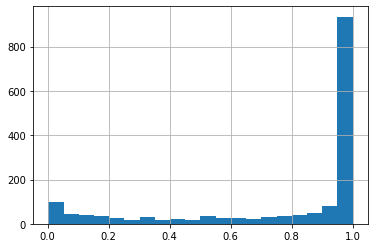

In [150]:
sub['smishing'].hist(bins=20)

In [0]:
a

In [151]:
import numpy as np
from sklearn import metrics
# y = np.array([1, 1, 0, 0])
# pred = np.array([0.1, 0.4, 0.35, 0.8, 0.1])
# pred = np.array([0.9, 0.6, 0.1, 0.4])
fpr, tpr, thresholds = metrics.roc_curve(a['human'],sub['smishing'], pos_label=1)
metrics.auc(fpr, tpr)

0.6492414248021108

In [0]:
fpr

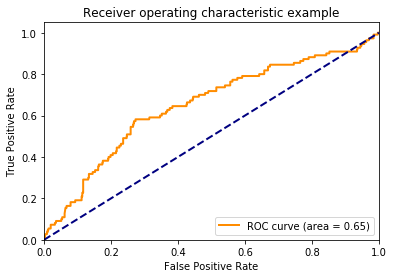

In [152]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2    # lw: line width, plot의 선 굵기
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
sub.to_csv('../submissions/[syh]_lstm_epoch10.csv',index=False)

In [0]:
4sub

,id,smishing
0,340000,0.000032
1,340001,0.000259
2,340002,0.000094
3,340003,0.000083
4,340004,0.025517
...,...,...
1621,341621,0.000809
1622,341622,0.000040
1623,341623,0.000011
1624,341624,0.000008


In [0]:
# import keras.backend as K

# def f_f1_score(y_true, y_pred):
#     # print(y_true)#, y_pred)
#     # print(y_pred)
#     def recall(y_true, y_pred):
#         """Recall metric.
#         Only computes a batch-wise average of recall.
#         Computes the recall, a metric for multi-label classification of
#         how many relevant items are selected.
#         """
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#         recall = true_positives / (possible_positives + K.epsilon())
#         return recall

#     def precision(y_true, y_pred):
#         """Precision metric.
#         Only computes a batch-wise average of precision.
#         Computes the precision, a metric for multi-label classification of
#         how many selected items are relevant.
#         """
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision
#     precision = precision(y_true, y_pred)
#     recall = recall(y_true, y_pred)
#     f1 = 2*((precision*recall)/(precision+recall+K.epsilon()))

#     return f1

# def recall(y_true, y_pred):
#     """Recall metric.
#     Only computes a batch-wise average of recall.
#     Computes the recall, a metric for multi-label classification of
#     how many relevant items are selected.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision(y_true, y_pred):
#     """Precision metric.
#     Only computes a batch-wise average of precision.
#     Computes the precision, a metric for multi-label classification of
#     how many selected items are relevant.
#     """
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

In [0]:
# stopwords = ['xxx', '.', '을', '를', '이', '가', '-', '(', ')', ':', '!', '?', ')-', '.-', 'ㅡ', 'xxxxxx', '..', '.(', '은', '는'] #필요없는 단어 리스트

# def get_couple(words):
#     global stopwords
#     words = [i for i in words if i[0] not in stopwords]
#     for i in range(len(words)-1):
#         # print(words[i][0])
#         yield words[i][0], words[i+1][0]
#         # words[i][0]은 stopwords로 걸러진 단어들

In [0]:
for x,y in get_couple(train_doc[0][0]):
    print(x,y)

In [0]:
# 코드 이해용
# for i in train_doc[:1]:
#     # print(i[0])
#     for j in i[0]:
#         # print(j[0])
#         if j[0] in stopwords:
#             print(j[0])

In [0]:
X_train, Y_train = [],[]

for lwords in train_doc:
    Y_train.append(lwords[1])

    temp = []

    for x,y in get_couple(lwords[0]):
        temp.append('{}.{}'.format(x,y))

    X_train.append(' '.join(temp))
        

    

In [0]:
X_train[:10]

['광고.S S.B B.I I.안녕 안녕.하 하.세요 세요.하루하루 하루하루.힘든 힘든.업무 업무.와 와.스트레스 스트레스.에 에.고생 고생.많 많.으십니다 으십니다.여유 여유.시간 시간.내 내.어 어.읽 읽.어 어.주 주.신다면 신다면.도움 도움.되 되.실 실.거 거.라 라.생각 생각.되 되.어 어.보내 보내.드립니다 드립니다.2017 2017.년 년.하반기 하반기.정부 정부.지원 지원.상품 상품.개편 개편.되 되.어 어.안 안.내 내.드립니다 드립니다.금년 금년.낮 낮.금리 금리.로 로.대출금 대출금.이용 이용.하 하.실 실.수 수.있 있.마지막 마지막.기회 기회.입니다 입니다.고민 고민.하 하.지 지.마시 마시.고 고.전화 전화.주세 주세.요 요.본 본.상품 상품.서민 서민.지원 지원.대출 대출.로 로.정부 정부.에서 에서.지원 지원.하 하.고 고.S S.B B.I I.에서 에서.판매 판매.하 하.대출 대출.상품 상품.입니다 입니다.상품 상품.특징 특징.1 1.무담보 무담보.무 무.보증 보증.무 무.수수료 수수료.2 2.신용 신용.등급 등급.상관없이 상관없이.3 3.최고 최고.한도 한도.90004 90004.최하 최하.금리 금리.4 4.24 24.% %.9 9.89 89.% %.5 5.상환 상환.수수료 수수료.없이 없이.자유 자유.롭 롭.게 게.상환 상환.가능 가능.6 6.기존 기존.대출 대출.저금리 저금리.전환 전환.가능 가능.자격 자격.조건 조건.1 1.만 만.21 21.세 세.65 65.세 세.2 2.직장인 직장인.사업자 사업자.프리랜서 프리랜서.주부 주부.3 3.최근 최근.부결 부결.자 자.다중 다중.채무자 채무자.가능 가능.신청 신청.기간 기간.9 9.월 월.29 29.일 일.마감 마감.접수 접수.자 자.많 많.으니 으니.빠른 빠른.신청 신청.바랍니다 바랍니다.신청 신청.방법 방법.상담 상담.가능 가능.하 하.실 실.때 때.카톡 카톡.추가 추가.또는 또는.전화 전화.주 주.시 시.면 면.상담 상담.가능 가능.하 하.십니다 십니다.상담 상담.전화 

In [0]:
X_test = []
for lwords in test_doc:
    
    temp = []
    for x, y in get_couple(lwords[0]):
        temp.append("{}.{}".format(x, y))
    
    X_test.append(" ".join(temp))

In [0]:
# tf-idf 써보기

from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer()

tfv.fit(X_train)

# tfv.fit_transform(X_train)
vec_x_train = tfv.transform(X_train).toarray()
vec_x_test = tfv.transform(X_test).toarray()


In [0]:
# 해싱벡터라이즈 써보기
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=300000)
hv.fit(X_train)

vec_x_train = hv.transform(X_train).toarray()
vec_x_test = hv.transform(X_test).toarray()

In [0]:

len(tfv.vocabulary_)

15693

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()

v.fit(X_train)

vec_x_train= v.transform(X_train).toarray()
vec_x_test= v.transform(X_test).toarray()

In [0]:
v.transform(X_train)

<19533x15693 sparse matrix of type '<class 'numpy.int64'>'
	with 635136 stored elements in Compressed Sparse Row format>

306531369

In [0]:
from sklearn.naive_bayes import MultinomialNB  # model 관련
from sklearn.metrics import roc_auc_score  

m1= MultinomialNB()
m1.fit(vec_x_train,Y_train)

y_train_pred1=m1.predict_proba(vec_x_train)
y_train_pred1_one= [ i[1]  for i in y_train_pred1]

y_test_pred1=m1.predict_proba(vec_x_test)
y_test_pred1_one= [ i[1]  for i in y_test_pred1]

In [0]:
ls

'11회 data'/           Mecab-ko-for-Google-Colab/   train.csv
 beginner_code.ipynb   public_test.csv              Untitled0.ipynb
'dacon data.ipynb'     submission_제출양식.csv


In [0]:
test

,id,year_month,text,smishing
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,2
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,2
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,2
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,2
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,2
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,2
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,2
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,2
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,2


In [0]:
sub = pd.read_csv('submission_제출양식.csv')

In [0]:
sub['smishing'] = y_test_pred1_one

sub.to_csv('tfidf_multiNB.csv',index=False)

In [0]:
sub

,id,smishing
0,340000,8.978513e-04
1,340001,1.806545e-02
2,340002,3.971244e-05
3,340003,5.130586e-05
4,340004,1.409122e-04
...,...,...
1621,341621,1.616251e-07
1622,341622,1.362140e-06
1623,341623,1.402413e-05
1624,341624,4.190341e-04
